In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_all_batches

folderpath = r"gas+sensor+array+drift+dataset/Dataset"
df = load_all_batches(folderpath)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f121,f122,f123,f124,f125,f126,f127,f128,label,batch
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,1,batch1
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,1,batch1
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,1,batch1
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,1,batch1
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756,1,batch1


In [2]:
# Features und Gasart extrahieren
X = df.iloc[:, 0:128].values
y = df.iloc[:, 128].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# init Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)
rf.fit(X_train, y_train)


# Vorhersage & Evaluation
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9953

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       513
           2       0.99      1.00      0.99       585
           3       1.00      0.99      1.00       328
           4       1.00      0.99      0.99       387
           5       0.99      1.00      1.00       602
           6       0.99      1.00      1.00       367

    accuracy                           1.00      2782
   macro avg       1.00      0.99      1.00      2782
weighted avg       1.00      1.00      1.00      2782



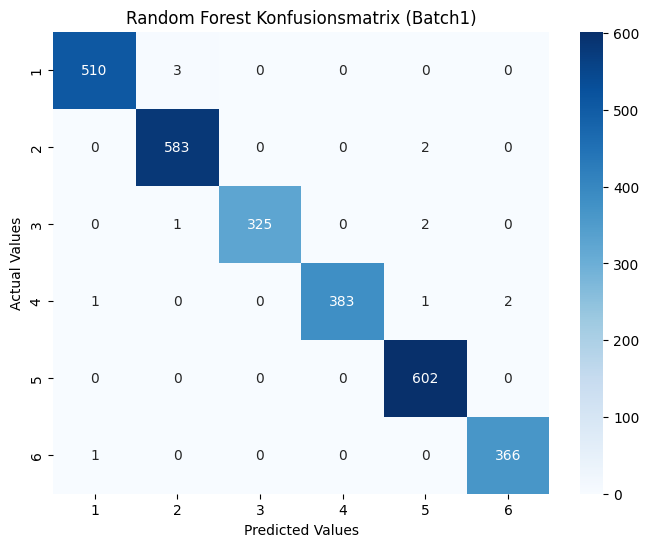

In [4]:
# Konfusionsmatrix
confmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Random Forest Konfusionsmatrix (Batch1)")
plt.show()

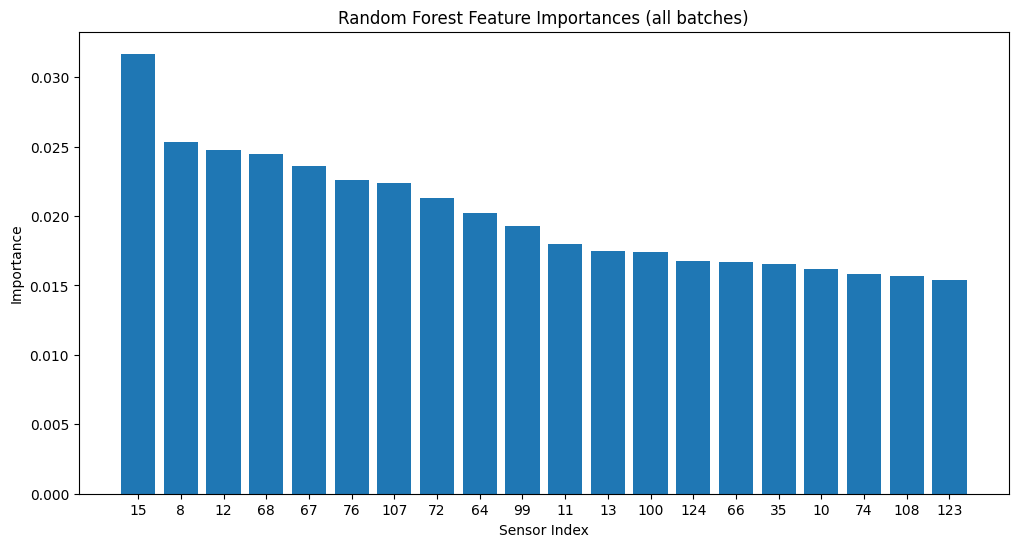

In [6]:
# Feature Importance von Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances (all batches)")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), indices[:20])
plt.xlabel("Sensor Index")
plt.ylabel("Importance")
plt.show()